# Question 1 : Pas de changement : Le réchauffement climatique est un mythe.



In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.set_style('darkgrid')
from matplotlib import style 
style.use('ggplot') or plt.style.use('ggplot')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data set earth temperature

In [0]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1nCdB3_FDoCm1cflXQQxwdPHuYDaf3kBfx6SfjQV8gPo/edit#gid=1963435622')

In [0]:
sheet = wb.worksheet('GlobalLandTemperaturesByCountry')

In [0]:
data = sheet.get_all_values()

In [0]:
df = pd.DataFrame(data)

In [9]:
df.shape

(577463, 4)

In [10]:
df.head()

0                   1                              2        3
0          dt  AverageTemperature  AverageTemperatureUncertainty  Country
1  1743-11-01               4.384                          2.294    Åland
2  1743-12-01                                                       Åland
3  1744-01-01                                                       Åland
4  1744-02-01                                                       Åland

### Nettoyage des données

In [0]:
df.columns = df.iloc[0]
df = df.iloc[1:]
df.reset_index(drop=True, inplace=True)

In [12]:
df.head()

0          dt AverageTemperature AverageTemperatureUncertainty Country
0  1743-11-01              4.384                         2.294   Åland
1  1743-12-01                                                    Åland
2  1744-01-01                                                    Åland
3  1744-02-01                                                    Åland
4  1744-03-01                                                    Åland

In [13]:
# Regarder les types des données
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   dt                             577462 non-null  object
 1   AverageTemperature             577462 non-null  object
 2   AverageTemperatureUncertainty  577462 non-null  object
 3   Country                        577462 non-null  object
dtypes: object(4)
memory usage: 17.6+ MB


In [0]:
# Convertir les données selon leur type
# object to datatime
df['dt'] =  pd.to_datetime(df['dt'])


In [0]:
# object to float
df['AverageTemperature'] = pd.to_numeric(df['AverageTemperature'], errors='coerce')

In [0]:
# object to float
df['AverageTemperatureUncertainty'] = pd.to_numeric(df['AverageTemperatureUncertainty'], errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             577462 non-null  datetime64[ns]
 1   AverageTemperature             544810 non-null  float64       
 2   AverageTemperatureUncertainty  545550 non-null  float64       
 3   Country                        577462 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.6+ MB


In [18]:
# Somme des données nulles in dataframe
df.isna().sum()

0
dt                                   0
AverageTemperature               32652
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [19]:
df.describe()

0      AverageTemperature  AverageTemperatureUncertainty
count       544810.000000                  545550.000000
mean            17.193341                       1.019057
std             10.953972                       1.201930
min            -37.658000                       0.052000
25%             10.025000                       0.323000
50%             20.901000                       0.571000
75%             25.814000                       1.206000
max             38.842000                      15.003000

In [0]:
# Suppression de la colonne 'AverageTemperatureUncertainty' :
# NOus allons visualizer uniquement les moyennes 

df.drop(['AverageTemperatureUncertainty'], axis = 1, inplace = True)


In [21]:
df.head()

0         dt  AverageTemperature Country
0 1743-11-01               4.384   Åland
1 1743-12-01                 NaN   Åland
2 1744-01-01                 NaN   Åland
3 1744-02-01                 NaN   Åland
4 1744-03-01                 NaN   Åland

In [0]:
# Renommer la colonne dt en Dates : 
df = df.rename(columns={'dt': 'dates'})

In [23]:
df.head()

0      dates  AverageTemperature Country
0 1743-11-01               4.384   Åland
1 1743-12-01                 NaN   Åland
2 1744-01-01                 NaN   Åland
3 1744-02-01                 NaN   Åland
4 1744-03-01                 NaN   Åland

In [0]:
# En attente retout Ishmael pour décier si l'on : remove les nan or replace to median or average
#ax1 = df.plot.bar(x='dt', y='AverageTemperature', c='DarkBlue')
#ax = df.plot.bar(x='dt', y='AverageTemperature', rot=0)

#Suppression des NAN
#Vérification sur copie = OK
#copie = df.copy()
#copie.dropna(inplace = True)
#copie.isna().sum()
#copie.head()


In [24]:
# Suppression sur Dataframe : 

df.dropna(inplace=True)
df.head()

0      dates  AverageTemperature Country
0 1743-11-01               4.384   Åland
5 1744-04-01               1.530   Åland
6 1744-05-01               6.702   Åland
7 1744-06-01              11.609   Åland
8 1744-07-01              15.342   Åland

In [25]:
# Create group by pour grouper les temperature par an par pays et faire la moyenne des température par an
df.groupby([df.dates.dt.strftime('%Y'), 'Country'])['AverageTemperature'].mean().reset_index(name='AverageTemperature')


dates         Country  AverageTemperature
0      1743         Albania             8.62000
1      1743         Andorra             7.55600
2      1743         Austria             2.48200
3      1743         Belarus             0.76700
4      1743         Belgium             7.10600
...     ...             ...                 ...
45910  2013  Western Sahara            23.74425
45911  2013           Yemen            28.12975
45912  2013          Zambia            21.19600
45913  2013        Zimbabwe            20.71075
45914  2013           Åland             6.22975

[45915 rows x 3 columns]

In [0]:
# Suite test modification du dataframe : 
df = df.groupby([df.dates.dt.strftime('%Y'), 'Country'])['AverageTemperature'].mean().reset_index(name='AverageTemperature')

In [27]:
df.head()

dates  Country  AverageTemperature
0  1743  Albania               8.620
1  1743  Andorra               7.556
2  1743  Austria               2.482
3  1743  Belarus               0.767
4  1743  Belgium               7.106

In [28]:
# Suite test seaborn drop pays car visualisation non pertinente : 
# La moyenne des température moyenne par année

df.groupby(by='dates')['AverageTemperature'].mean().reset_index(name='AverageTemperature')

dates  AverageTemperature
0    1743            5.184140
1    1744            9.837898
2    1745            1.387125
3    1750            9.129353
4    1751            9.167388
..    ...                 ...
262  2009           19.546385
263  2010           19.629806
264  2011           19.456040
265  2012           19.467585
266  2013           19.850897

[267 rows x 2 columns]

In [29]:
# Modification du data frame
df = df.groupby(by='dates')['AverageTemperature'].mean().reset_index(name='AverageTemperature')
df.head()

dates  AverageTemperature
0  1743            5.184140
1  1744            9.837898
2  1745            1.387125
3  1750            9.129353
4  1751            9.167388

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dates               267 non-null    object 
 1   AverageTemperature  267 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


### Visualisation des Données

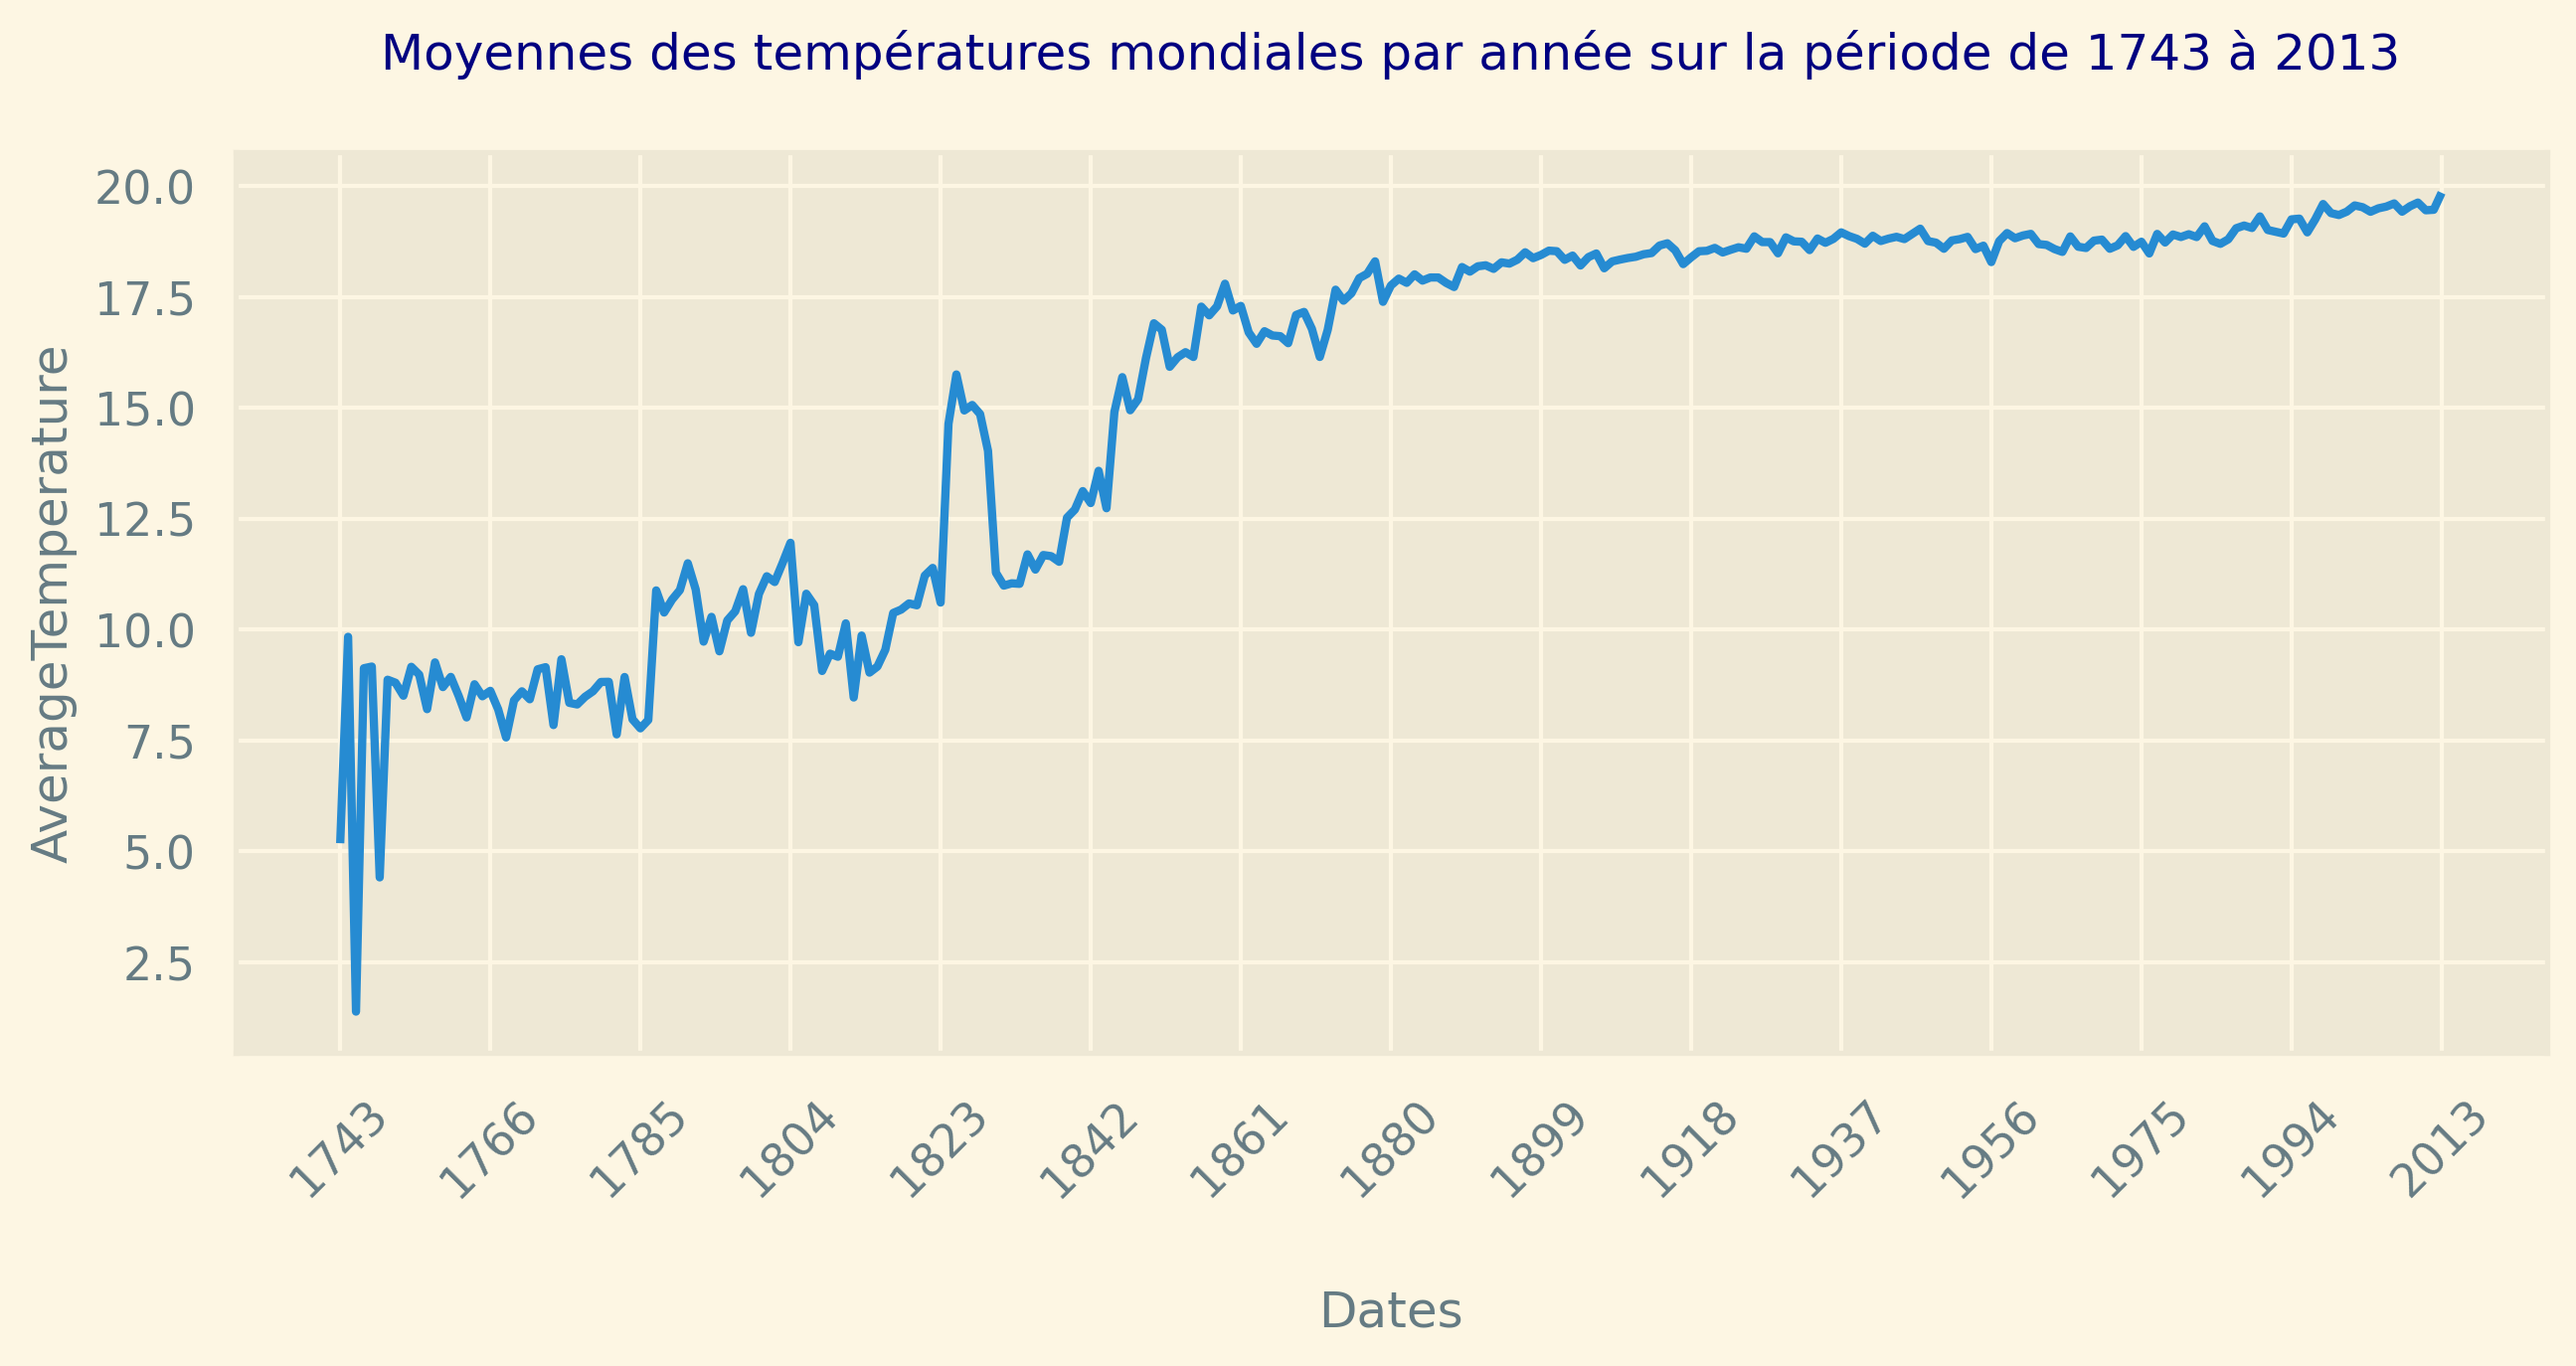

In [42]:
# Visualisation avec seaborn
from matplotlib.ticker import MultipleLocator, FormatStrFormatter



#sns.set(rc={'figure.figsize':(20,8)})



with plt.style.context('Solarize_Light2'):
  fig, ax = plt.subplots(1,1, figsize=(10, 4), dpi=300)
  sns.lineplot(x='dates', y='AverageTemperature', data = df, linewidth=2)

#plt.margins(0)
plt.xticks(rotation='45')
plt.title('Moyennes des températures mondiales par année sur la période de 1743 à 2013', color = 'navy', pad=20)
#plt.gca().xaxis.set_ticks(range(0, 290,7), minor = False)
plt.xlabel('Dates', labelpad=20)
plt.xticks(df["dates"][::19], df["dates"][::19])

plt.show()

fig.savefig("EvolTempEarth.png")



### Export CSV

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dates               267 non-null    object 
 1   AverageTemperature  267 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [33]:
df.head()

dates  AverageTemperature
0  1743            5.184140
1  1744            9.837898
2  1745            1.387125
3  1750            9.129353
4  1751            9.167388

In [34]:
#df['dates']= pd.to_datetime(df['dates'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dates               267 non-null    object 
 1   AverageTemperature  267 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [0]:
df.to_csv('exportMergeTempEarthGlobal.csv', index = False)
